In [4]:
from scipy.optimize import linprog

fuel_factor = 0.2
co2_factor = 0.8

c = [(fuel_factor*200 + co2_factor*430), (fuel_factor*230 + co2_factor*210), (fuel_factor*10 + co2_factor*20), (fuel_factor*100 + co2_factor*530)]

A_eq = [[1, 1, 1, 1]]
b_eq = [521]

x0_bounds = (30, 250)
x1_bounds = (100, 200)
x2_bounds = (70, 100)
x3_bounds = (60, 300)

integrality = [2, 2, 2, 2]

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds, x2_bounds, x3_bounds], method='highs', integrality=integrality)

print("Maximizing value : ", res.fun)
print("Optimal solution : ", res.x)
print("\n")

Maximizing value :  129464.0
Optimal solution :  [221. 200. 100.   0.]




In [1]:
from pulp import *

cost_weight = 0.2
co2_weight = 0.8
is_running = True

# Create the 'prob' variable to contain the problem data
prob = LpProblem("Simple LP Problem", LpMinimize)

# Create problem variables
x1 = LpVariable("x1", 0, 250)
x2 = LpVariable("x2", 0, 200)
x3 = LpVariable("x3", 0, 100)
x4 = LpVariable("x4", 0, 300)

x = {'x1':(30, 250), 'x2':(100, 200), 'x3':(70, 100), 'x4':(60, 300)}

# The objective function is added to 'prob' first
prob += (cost_weight*200 + co2_weight*430)*x1 + (cost_weight*230 + co2_weight*210)*x2 + (cost_weight*10 + co2_weight*20)*x3 + (cost_weight*100 + co2_weight*530)*x4
#prob += 3*fun1(x) + 2*fun2(y), "objective_function"

# The constraints are added to 'prob' one at a time
prob += x1 + x2 + x3 + x4 == 551

# The problem data is written to an .lp file
prob.writeLP("SimpleLP.lp")

while(is_running):
    is_running = False
    # The problem is solved using PuLP's choice of Solver
    prob.solve()

    # The status of the solution is printed to the screen
    print("Status:", LpStatus[prob.status])

    # Each of the variables is printed with it's resolved optimum value
    for v in prob.variables():
        print(v.name, "=", v.varValue)
        if v.varValue != 0 and v.varValue < x[v.name][0]:
            v.bounds(x[v.name][0], x[v.name][1])
            is_running = True

# The optimised objective function value is printed to the screen
print("objective_function = ", value(prob.objective))


d:\Fax\ISIS_Load_Prediction\.venv\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Status: Optimal
x1 = 250.0
x2 = 200.0
x3 = 100.0
x4 = 1.0
Status: Optimal
x1 = 191.0
x2 = 200.0
x3 = 100.0
x4 = 60.0
objective_function =  144584.0


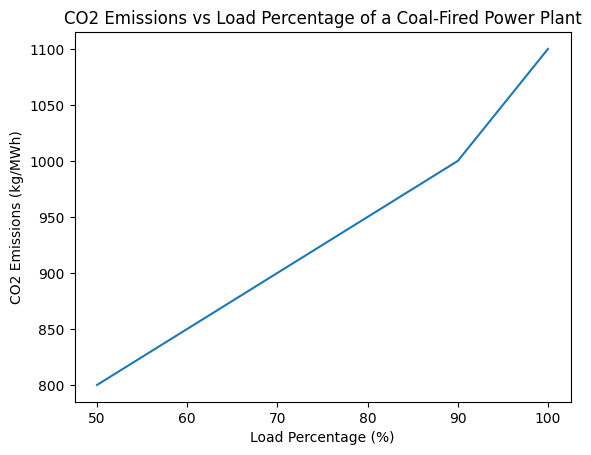

In [3]:
import matplotlib.pyplot as plt

# Sample data
load_percentage = [50, 60, 70, 80, 90, 100]
co2_emissions = [800, 850, 900, 950, 1000, 1100]

# Create a scatter plot
plt.plot(load_percentage, co2_emissions)

# Add labels and title
plt.xlabel("Load Percentage (%)")
plt.ylabel("CO2 Emissions (kg/MWh)")
plt.title("CO2 Emissions vs Load Percentage of a Coal-Fired Power Plant")

# Show the plot
plt.show()
